<a href="https://colab.research.google.com/github/MaanasSM/Deep-Learning-Mini-Projects/blob/main/CNN_lab4_5_02_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

concolution and cnn

input -> convolution layer -> Activation Function -> pooling -> fully connected layer -> softmax function -> output

database used : MNIST
a popular dataset with over 60k training inputs and around 10k testing...

inputs are images

Here, you will use  


In [ ]:
# Step 1: Install and Import Libraries
!pip install tensorflow
!pip install scikit-learn # for confusion matrix
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns  # for visualizing confusion matrix
# Step 2: Load and Preprocess the MNIST dataset
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data() #this dataset is preloaded in keras








In [ ]:
# Reshape and normalize the data
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

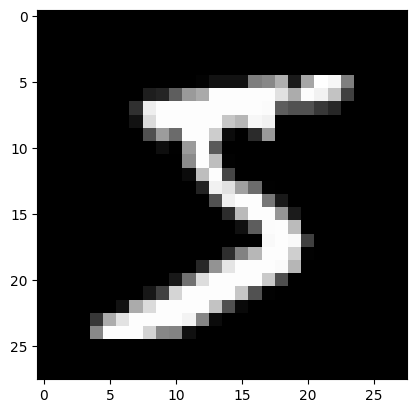

In [ ]:
#Plotting the sample image
plt.imshow(x_train[0], cmap='gray')
plt.show()

In [ ]:
# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


# Step 3: Build the CNN Model
model = models.Sequential()


# First convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))


# Second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


# Flatten the output from convolutional layers
model.add(layers.Flatten())


# Fully connected layer
model.add(layers.Dense(64, activation='relu'))


# Output layer with softmax activation
model.add(layers.Dense(10, activation='softmax'))


# Step 4: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Visualising the model
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

NameError: name 'model' is not defined

/usr/local/lib/python3.11/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


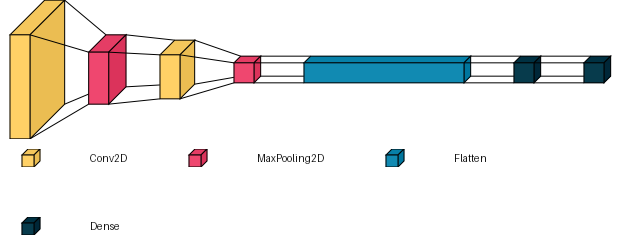

In [ ]:
# Visualising the model in layered format
!pip install visualkeras
import visualkeras
visualkeras.layered_view(model,legend=True,spacing=50,background_fill = 'white')

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.8700 - loss: 0.4279 - val_accuracy: 0.9801 - val_loss: 0.0588
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9827 - loss: 0.0587 - val_accuracy: 0.9795 - val_loss: 0.0611
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9876 - loss: 0.0403 - val_accuracy: 0.9866 - val_loss: 0.0436
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9910 - loss: 0.0273 - val_accuracy: 0.9898 - val_loss: 0.0331
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9925 - loss: 0.0226 - val_accuracy: 0.9879 - val_loss: 0.0386
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9944 - loss: 0.0166 - val_accuracy: 0.9913 - val_loss: 0.0299
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9959 - loss: 0.0123 - val_accuracy: 0.9896 - val_loss: 0.0313
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9972 - loss: 0.0090 - val_accuracy: 

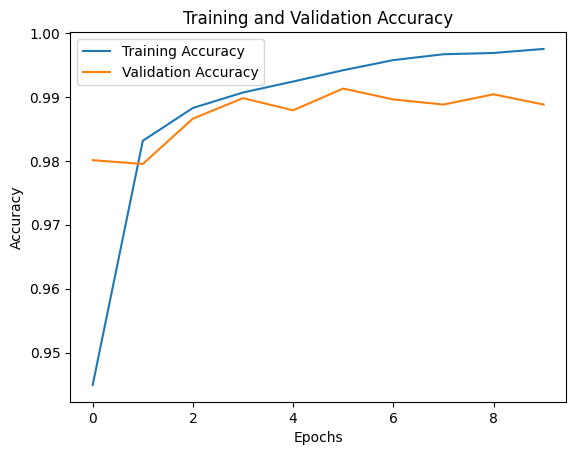

In [ ]:
# Step 5: Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))


# Step 6: Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")


# Step 7: Visualize Results
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


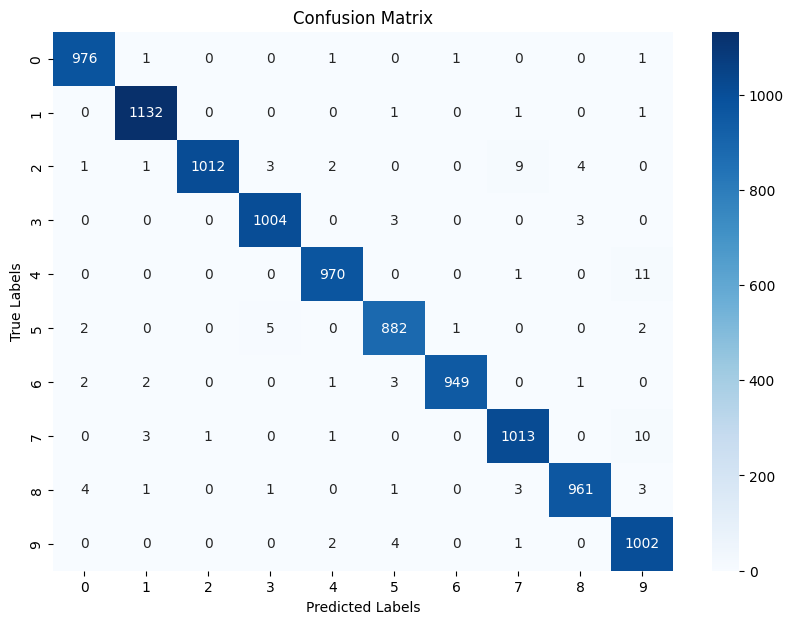

In [ ]:
# Step 8: Predictions and Confusion Matrix
# Get the predicted class labels
y_pred = model.predict(x_test)
y_pred_classes = tf.argmax(y_pred, axis=1)


# Get the true class labels
y_true = tf.argmax(y_test, axis=1)


# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)


# Visualize confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


testing accuracy = ?
total = 10k
of which, 9903 images are wrongly classified
therefore, testing accuracy = 1 - (9903/10000) =

Test accuracy: 0.9887999892234802 for filter 32, 64

Test accuracy: 0.9876999855041504, for filter 128,64

Test accuracy: 0.9620000123977661 for filter 512, 64